In [274]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [235]:
sms = pd.read_csv("spam.csv",encoding="latin-1")

In [236]:
sms.shape

(5572, 5)

In [237]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# DATA CLEANING

In [238]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dropping last 3 columns as most of the values are missing.

In [239]:
sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [240]:
sms.sample(5)

,v1,v2
2777,ham,Kind of. Took it to garage. Centre part of exh...
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000..."
2061,ham,Hey ! I want you ! I crave you ! I miss you ! ...
3320,ham,Yo im right by yo work
2404,ham,Please give it 2 or i will pick it up on Tues...


Changing name of column for better insight

In [241]:
sms.rename(columns={'v1': 'Target', 'v2': 'Message'}, inplace=True)

In [242]:
sms.sample(5)

,Target,Message
250,ham,Ranjith cal drpd Deeraj and deepak 5min hold
2009,ham,I can't keep going through this. It was never ...
1209,ham,His bday real is in april .
4768,ham,watever reLation u built up in dis world only ...
3264,spam,"44 7732584351, Do you want a New Nokia 3510i c..."


Transforming Target values in to 0 and 1

In [243]:
encoder = LabelEncoder()

In [244]:
encoder.fit_transform(sms['Target'])

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [245]:
sms['Target'] = encoder.fit_transform(sms['Target'])

Missing value check

In [246]:
print(sms.isnull().sum())

Target     0
Message    0
dtype: int64


Checking for Duplicate Values

In [247]:
sms.duplicated().sum()

np.int64(403)

In [248]:
sms.drop_duplicates(keep='first', inplace=True)

#   EDA

In [249]:
sms['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

(np.float64(-1.0999999971229135),
 np.float64(1.0999999502099036),
 np.float64(-1.099999817362074),
 np.float64(1.0999999170454193))

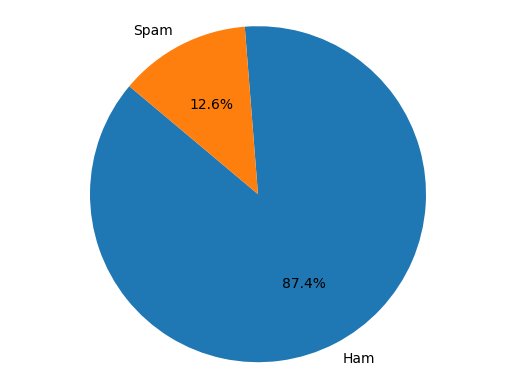

In [250]:
plt.pie(sms['Target'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [251]:
sms['numeric_characters']=sms['Message'].apply(len)

In [252]:
sms.head()

,Target,Message,numeric_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [253]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jdpat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [254]:
sms['No. of words'] = sms['tokens'] = sms['Message'].apply(lambda x:len( x.split()))
sms.head()

,Target,Message,numeric_characters,No. of words,tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,28
3,0,U dun say so early hor... U c already then say...,49,11,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,13


In [255]:
import re

def count_sentences(text):
    sentences = re.split(r'[.!?]+(?=\s|$)', text.strip())
    return len([s for s in sentences if s.strip()])

sms['No. sentences'] = sms['Message'].apply(count_sentences)


In [256]:
sms.head()

,Target,Message,numeric_characters,No. of words,tokens,No. sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20,3
1,0,Ok lar... Joking wif u oni...,29,6,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,28,2
3,0,U dun say so early hor... U c already then say...,49,11,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,13,1


In [257]:
sms[['numeric_characters','No. of words','No. sentences']].describe()

,numeric_characters,No. of words,No. sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.060747
std,58.236293,11.068488,1.442320
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,31.000000


In [258]:
sms[sms['Target'] == 1][['numeric_characters','No. of words','No. sentences']].describe()

,numeric_characters,No. of words,No. sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.569463
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [259]:
sms[sms['Target'] == 0][['numeric_characters','No. of words','No. sentences']].describe()

,numeric_characters,No. of words,No. sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.916962
std,56.358207,11.116240,1.364464
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,31.000000


<Axes: xlabel='numeric_characters', ylabel='Count'>

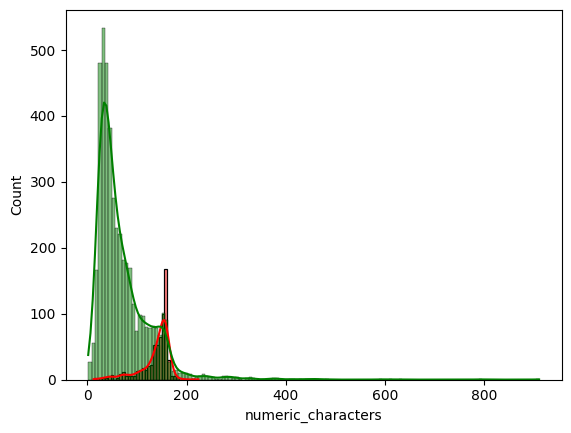

In [260]:
sns.histplot(sms[sms['Target']==1]['numeric_characters'], kde=True, color='red', label='Ham', stat='count')
sns.histplot(sms[sms['Target']==0]['numeric_characters'], kde=True, color='green', label='Ham', stat='count')

<Axes: xlabel='No. of words', ylabel='Count'>

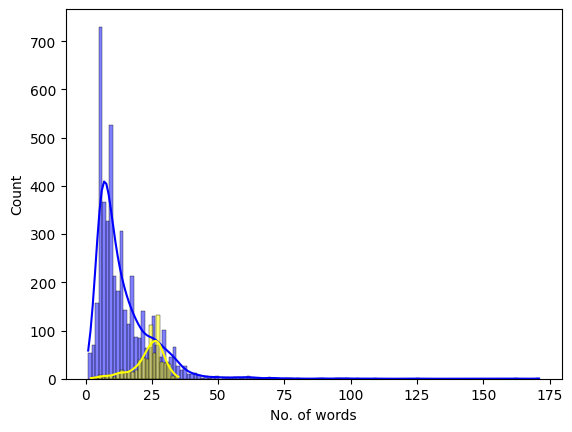

In [261]:
sns.histplot(sms[sms['Target']==0]['No. of words'], kde=True, color='blue', label='Ham', stat='count')
sns.histplot(sms[sms['Target']==1]['No. of words'], kde=True, color='yellow', label='Ham', stat='count')

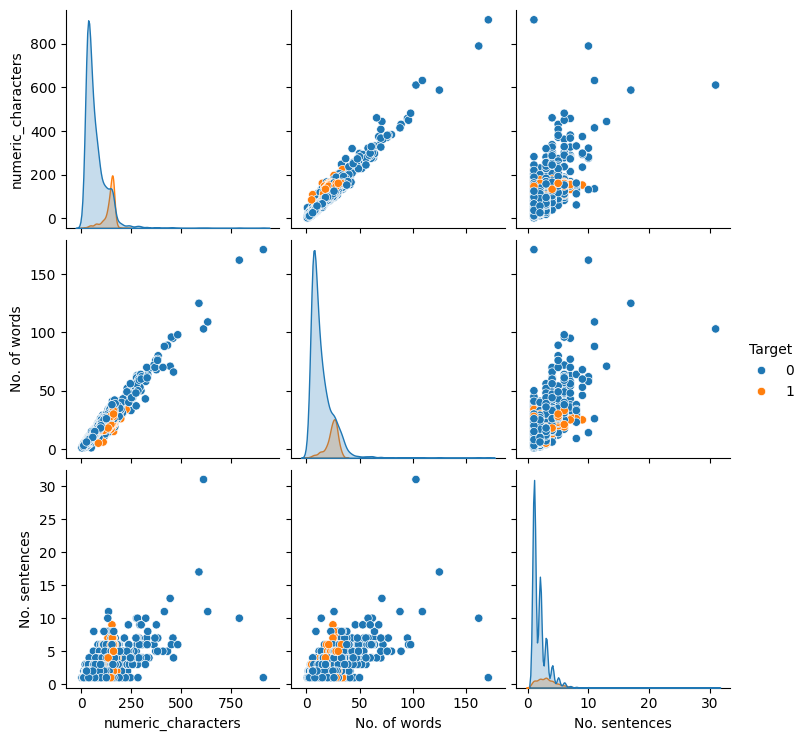

In [262]:
sns.pairplot(sms, hue='Target', vars=['numeric_characters', 'No. of words', 'No. sentences'], diag_kind='kde')

<Axes: >

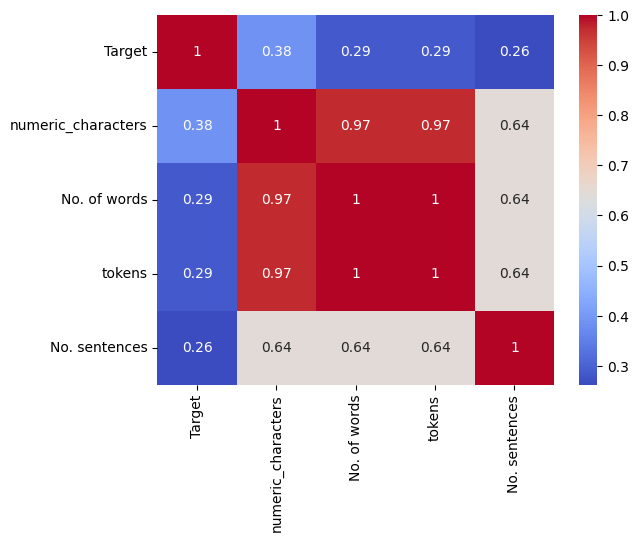

In [265]:
sns.heatmap(sms.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

#   DATA PREPROCESSING

In [270]:
import snowballstemmer

# Initialize stemmer for English
stemmer = snowballstemmer.stemmer('english')

# Basic stopword list (no nltk)
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
    'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

def transform_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation, including %
    words = text.split()  # Tokenize by whitespace
    filtered = [word for word in words if word not in stop_words]  # Remove stopwords
    stemmed = stemmer.stemWords(filtered)  # Apply stemming
    return " ".join(stemmed)


In [ ]:
sms['Transformed Message'] = sms['Message'].apply(transform_text)

In [272]:
sms.head()

,Target,Message,numeric_characters,No. of words,tokens,No. sentences,Transformed Message
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,28,2,free entri wkli comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,11,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,13,1,nah dont think goe usf live around though


In [275]:
wc = WordCloud(width=800, height=400, min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(sms[sms['Target'] == 1]['Transformed Message'].str.cat(sep=' '))

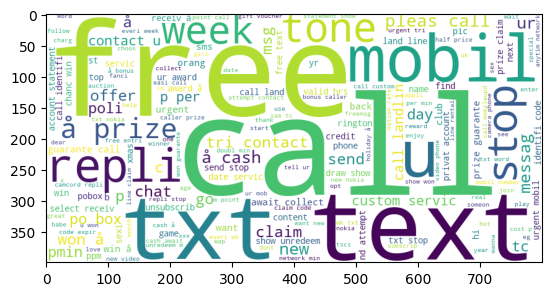

In [277]:
plt.imshow(spam_wc)

In [278]:
ham_wc = wc.generate(sms[sms['Target'] == 0]['Transformed Message'].str.cat(sep=' '))

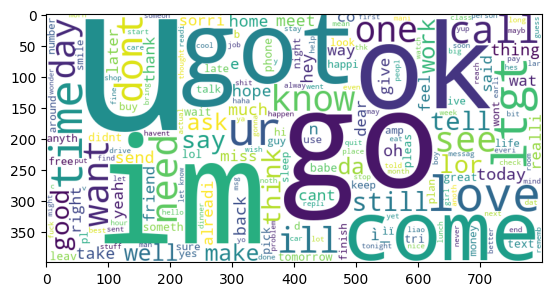

In [279]:
plt.imshow(ham_wc)

In [284]:
spam_corpus = []
for msg in sms[sms['Target']==1]['Transformed Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [285]:
len(spam_corpus)

9536

(0        call
 1           å
 2        free
 3           u
 4         txt
 5        text
 6          ur
 7       mobil
 8        stop
 9       repli
 10      claim
 11      prize
 12        get
 13       week
 14        new
 15     servic
 16          p
 17       tone
 18      nokia
 19       send
 20        won
 21     urgent
 22    contact
 23      award
 24      phone
 25       cash
 26      pleas
 27        win
 28        min
 29    collect
 Name: 0, dtype: object,
 <Axes: >)

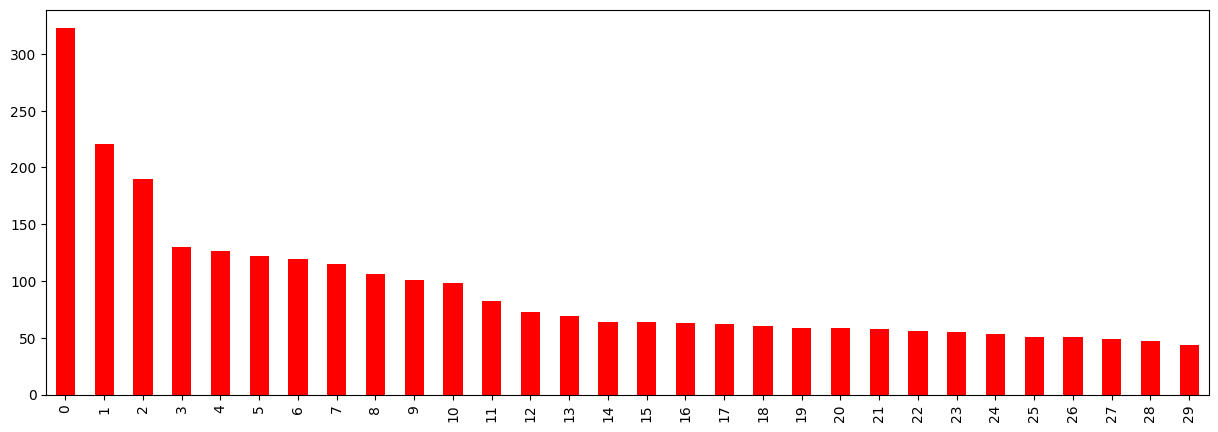

In [287]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1].plot(kind='bar', figsize=(15, 5), color='red')

#   MODEL BUILDING

In [328]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [289]:
x = cv.fit_transform(sms['Transformed Message']).toarray()

In [291]:
x.shape

(5169, 7135)

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, sms['Target'], test_size=0.2, random_state=2)

In [302]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score

In [299]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [314]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8781431334622823
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       896
           1       0.53      0.84      0.65       138

    accuracy                           0.88      1034
   macro avg       0.75      0.86      0.79      1034
weighted avg       0.91      0.88      0.89      1034

[[792 104]
 [ 22 116]]
0.5272727272727272


In [312]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8781431334622823
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.81      0.91      0.85       138

    accuracy                           0.96      1034
   macro avg       0.90      0.94      0.91      1034
weighted avg       0.96      0.96      0.96      1034

[[866  30]
 [ 13 125]]
0.8064516129032258


In [313]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8781431334622823
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.96      0.81      0.88       138

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[891   5]
 [ 26 112]]
0.9572649572649573


In [335]:
x = tfidf.fit_transform(sms['Transformed Message']).toarray()

In [336]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, sms['Target'], test_size=0.2, random_state=2)

In [337]:
gnb.fit(x_train1, y_train1)
y_pred4 = gnb.predict(x_test1)
print(accuracy_score(y_test1, y_pred4))
print(classification_report(y_test1, y_pred4))
print(confusion_matrix(y_test1, y_pred4))
print(precision_score(y_test1, y_pred4))

0.8433268858800773
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       896
           1       0.45      0.80      0.58       138

    accuracy                           0.84      1034
   macro avg       0.71      0.83      0.74      1034
weighted avg       0.90      0.84      0.86      1034

[[761 135]
 [ 27 111]]
0.45121951219512196


In [338]:
mnb.fit(x_train1, y_train1)
y_pred5 = mnb.predict(x_test1)
print(accuracy_score(y_test1, y_pred5))
print(classification_report(y_test1, y_pred5))
print(confusion_matrix(y_test1, y_pred5))
print(precision_score(y_test1, y_pred5))

0.9729206963249516
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.80      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

[[896   0]
 [ 28 110]]
1.0


In [339]:
bnb.fit(x_train1, y_train1)
y_pred6 = bnb.predict(x_test1)
print(accuracy_score(y_test1, y_pred6))
print(classification_report(y_test1, y_pred6))
print(confusion_matrix(y_test1, y_pred6))
print(precision_score(y_test1, y_pred6))

0.9796905222437138
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

[[895   1]
 [ 20 118]]
0.9915966386554622


TFIDF,MNB